### Labeling Features

This example shows how to add labels to vector layer features using Matplotlib. We will take a polygon layer of districts and add an annotation to show the district name at the centroid of each polygon.


#### Setup and Data Download

In [1]:
%%capture
if 'google.colab' in str(get_ipython()):
  !apt install libspatialindex-dev
  !pip install fiona shapely pyproj rtree mapclassify
  !pip install geopandas

In [3]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [5]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

filename = 'karnataka.gpkg'
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/osm/'
download(data_url + filename)


Downloaded data/karnataka.gpkg


#### Data Pre-Processing

We read the `districts` layer from the input geopackage using GeoPandas.

In [7]:
path = os.path.join(data_folder, filename)
districts_gdf = gpd.read_file(path, layer='karnataka_districts')

Let's say we want to add a label for each of the distrit polygons. First, we need to decide the anchor position of the label. We can use `representative_point()` to get a point inside each polygon that best represents the geometry. It is similar to a centroid, but is guranteed to be inside the polygon. Below code creates a new field in the GeoDataFrame called `label_position` with the coordinates of the anchor point.

In [ ]:
def get_label_position(row):
  geometry = row['geometry']
  location = geometry.representative_point()
  # We need the location as a tuple of x,y coordinates
  location_coords = location.coords[0]
  return location_coords

districts_gdf['label_position'] = districts_gdf.apply(get_label_position, axis=1)
districts_gdf

#### Annotating Labels

We can now plot the districts and add an annotation for each polygon. We iterate over each row of the GeoDataFrame and add the annotation with name of the district at its centroid coordinates using `annotate()` function.

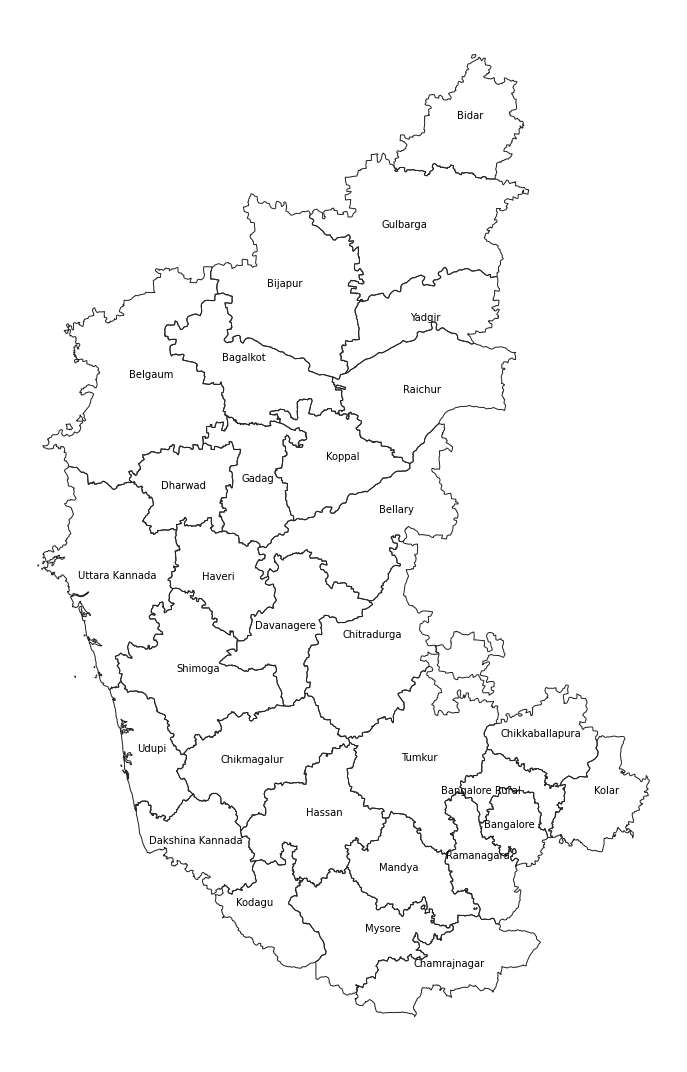

In [17]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,15)
districts_gdf.plot(ax=ax, linewidth=1, facecolor='none', edgecolor='#252525')


for idx, row in districts_gdf.iterrows():
   ax.annotate(text=row['DISTRICT'], xy=row['label_position'], horizontalalignment='center')
ax.set_axis_off()
plt.tight_layout()
plt.show()

